## In-class exercise for tutorial 010

In this exercise we will practice making datasets. We will on the one hand simulating data, on the other hand not quite as we will be making some asumptions and simplifaction on the data generation process that will not make the data.

Nestor lives right under the ATX airport, along the routes of airliners from major companies (United, Delt, etc).

Because of that Nestor hears noise. The noise is generated by the airplanes landing and taking off. There is a lot of noise that is generated by these airplanes. One day Nestor decides to simulate the noise generated by the airplanes and reaching his years. [Nestor is worried about his hearing loss](https://www.cdc.gov/niosh/topics/aircrew/noise.html). 

### The problem to simulate

Nestor is interested in calculating how much noise he is being exposed to. So he goes and looks up the timetable during the 3 hours window in the morning, when he is at home, and during the 7 hours window in the evening, when he is at hom, and before midnight when the airport shuts down and no more flights land or takeoff.

Nestor lives about 2 miles away from the airport. At that distance each jet generates about 75-80 dB (Decibels).
We will say 75dB. In the morning there are about 45 airplanes that land/takeoff. Each airplane can be heard consistently for about 7 minutes (we will assume a flat top distribution of the dBs, no ramp up, no decay, a simple flat distribution).

In the 3 hours window of the morning, Airplanes depart and land every 3 minutes, so their noise overlap for about 4 minutes. The dB of an airplane is corrupted by noise due to the city and nature around around, the cars, trains, trucks (all add some noise, randomly) and the position of the moving cloud in the sky, the wind and humidity (all diminish the noise randomly). So the noise is never 75dB but it stays on average around 75 dB while being corrupted by noise.

In the 7 hours window of the evening, Airplanes depart and land about every 4 minutes, so their noise overlaps for about 3 minutes. 

Nestor will assume a linear summation of the airplane noise in a single day. This is not the best way especially when dealing with dB, but this is a simple exercise and we can break some fundamental physics rules to make things easier for us. We will want to simulate the situation. 

How many airplanes depart/land in the morning widow of a single day. How many in the evening window? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [3]:
# Morning
minutes_total_morning = 180
minutes_planes_land_m = 3
num_planes_morn = int(((minutes_total_morning) / 
                       (minutes_planes_land_m)))

# Night 
minutes_total_evening = (60 * 7)
minutes_planes_land_e = 4
num_planes_even = int(((minutes_total_evening) /
                      (minutes_planes_land_e)))

#Printing
print("Planes in Morning:")
print(num_planes_morn)
print("Planes in Evening")
print(num_planes_even)
print()

Planes in Morning:
60
Planes in Evening
105



Show the noise profile of one airplane in the morning (pure for the moment no corruption but other exsternal noise) 

[75. 75. 75. 75. 75. 75. 75.]


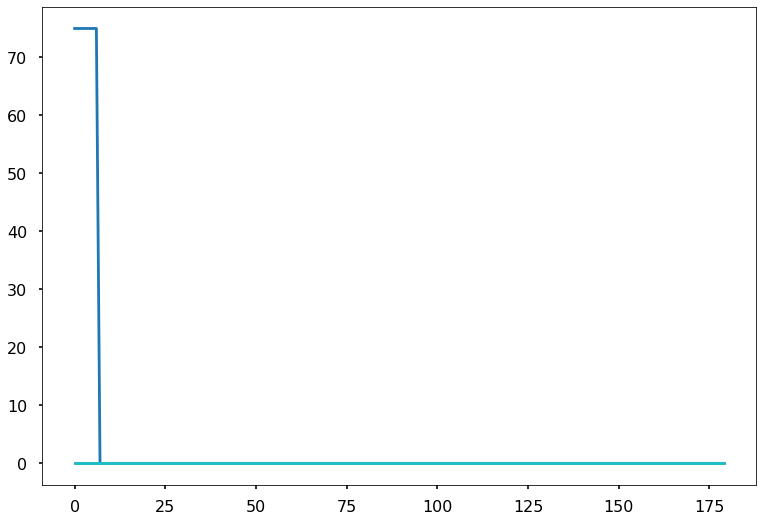

In [4]:
decibals = 75
minutes_per_plane = 7
"""
total_airplanes_m = np.zeros((num_planes_morn, minutes_total_morning))
total_airplanes_m[0, 0:8] = decibals
print(total_airplanes_m[0, :])
# Plotting the data
plt.plot(total_airplanes_m[0, :]);
"""
"""
total_airplanes_morning =  np.zeros((minutes_total_morning,
                            num_planes_morn))

airplane_one = np.ones((7,1)) * decibals
print(airplane_one)
total_airplanes_morning[0:7, :1] = airplane_one
plt.plot(total_airplanes_morning[:,0]);
"""

total_airplanes_m =  np.zeros((minutes_total_morning,
                            num_planes_morn))

#airplane_one = np.ones((7,1)) * decibals
#print(airplane_one)
total_airplanes_m[:7, 0] = decibals
plane_1 = total_airplanes_m[0:7, 0] 
print(plane_1)
plt.plot(total_airplanes_m);

Show the noise profile of the same airplane corrupted by some small noise. 

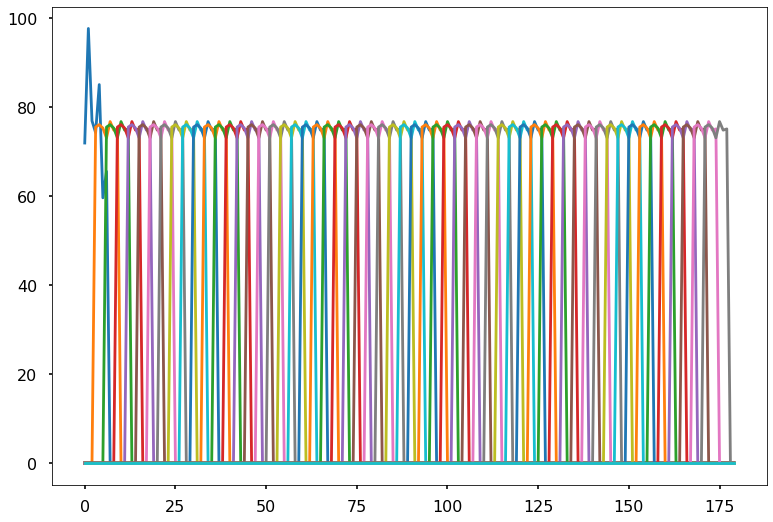

In [43]:
"""
noise_amplitude = 2
noise_measure = noise_amplitude * np.random.randn(*total_airplanes_m.shape)
planes = total_airplanes_m + noise_measure
plt.plot(planes[0, : ]);
"""
""""
# creating noise in the data
noise_amplitude = 2
noise_measure = noise_amplitude * np.random.randn(*airplane_one.shape)
airplane_noise = airplane_one + noise_measure
total_airplanes_morning[0:7, :1] = airplane_noise # getting the first seven hours.

# plotting it
total_airplanes_morning[0:7, 0]
plt.plot(total_airplanes[:, 0])
"""

noise_amplitude = 2
noise_measure = noise_amplitude * np.random.randn(*plane_1.shape)
airplane_noise = plane_1 + noise_measure
total_airplanes_m[0:7, 0] = airplane_noise # getting the first seven hours.

# plotting it
plt.plot(total_airplanes_m);

Now add a second airplane, corrupted by noise but departing/landing at a different time. Make a plot of the two airplanes together.

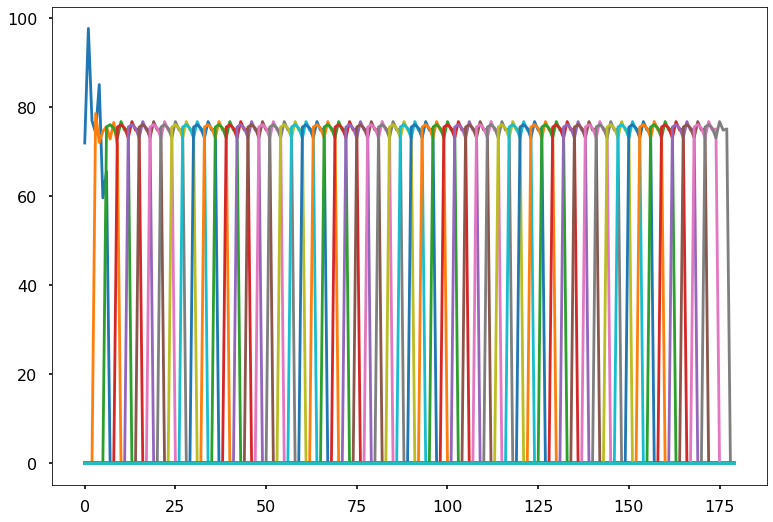

In [44]:
"""
total_airplanes_m[1, 3:11] = decibals
planes = total_airplanes_m + noise_measure
plt.plot(planes[0, :])
plt.plot(planes[1, :])
"""
""""
# Doing something similar that has already been done.
plane2 = np.ones((7,1)) * decibals
noise_measurement = noise_amplitude * np.random.randn(*plane2.shape)
plane_noise = plane2 + noise_measurement
total_airplanes_morning[3:10, :2] = plane_noise
# Plotting the data
plt.plot(total_airplanes_morning);
"""
total_airplanes_m[3:10, 1] = noise_measure + decibals
plt.plot(total_airplanes_m);

Finally, simulate all the the airplanes that you have estimated to land/depart in the morning. Plot them on the same figure.

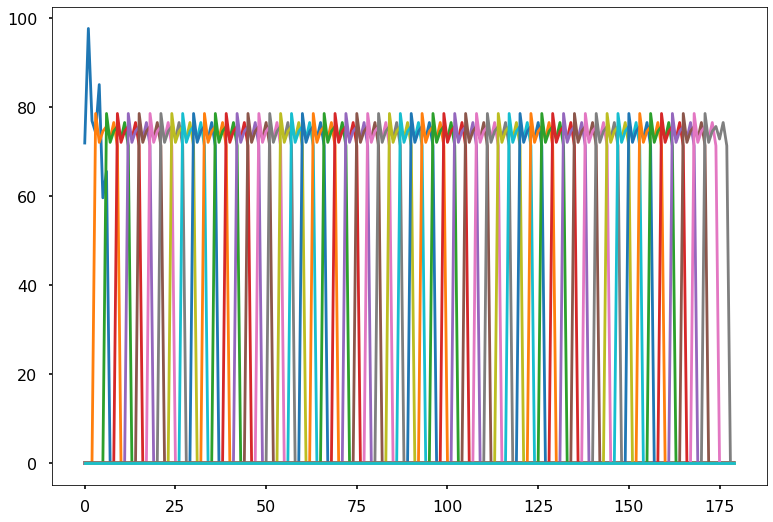

In [45]:
total_airplanes_m[6:13, 2] = noise_measure + decibals
total_airplanes_m[9:16, 3] = noise_measure + decibals
total_airplanes_m[12:19, 4] = noise_measure + decibals
total_airplanes_m[15:22, 5] = noise_measure + decibals
total_airplanes_m[18:25, 6] = noise_measure + decibals
total_airplanes_m[21:28, 7] = noise_measure + decibals
total_airplanes_m[24:31, 8] = noise_measure + decibals
total_airplanes_m[27:34, 9] = noise_measure + decibals
total_airplanes_m[30:37, 10] = noise_measure + decibals
total_airplanes_m[33:40, 11] = noise_measure + decibals
total_airplanes_m[36:43, 12] = noise_measure + decibals
total_airplanes_m[39:46, 13] = noise_measure + decibals
total_airplanes_m[42:49, 14] = noise_measure + decibals
total_airplanes_m[45:52, 15] = noise_measure + decibals
total_airplanes_m[48:55, 16] = noise_measure + decibals
total_airplanes_m[51:58, 17] = noise_measure + decibals
total_airplanes_m[54:61, 18] = noise_measure + decibals
total_airplanes_m[57:64, 19] = noise_measure + decibals
total_airplanes_m[60:67, 20] = noise_measure + decibals
total_airplanes_m[63:70, 21] = noise_measure + decibals
total_airplanes_m[66:73, 22] = noise_measure + decibals
total_airplanes_m[69:76, 23] = noise_measure + decibals
total_airplanes_m[72:79, 24] = noise_measure + decibals
total_airplanes_m[75:82, 25] = noise_measure + decibals
total_airplanes_m[78:85, 26] = noise_measure + decibals
total_airplanes_m[81:88, 27] = noise_measure + decibals
total_airplanes_m[84:91, 28] = noise_measure + decibals
total_airplanes_m[87:94, 29] = noise_measure + decibals
total_airplanes_m[90:97, 30] = noise_measure + decibals
total_airplanes_m[93:100, 31] = noise_measure + decibals
total_airplanes_m[96:103, 32] = noise_measure + decibals
total_airplanes_m[99:106, 33] = noise_measure + decibals
total_airplanes_m[102:109,34] = noise_measure + decibals
total_airplanes_m[105:112, 35] = noise_measure + decibals
total_airplanes_m[108:115, 36] = noise_measure + decibals
total_airplanes_m[111:118, 37] = noise_measure + decibals
total_airplanes_m[114:121, 38] = noise_measure + decibals
total_airplanes_m[117:124, 39] = noise_measure + decibals
total_airplanes_m[120:127, 40] = noise_measure + decibals
total_airplanes_m[123:130, 41] = noise_measure + decibals
total_airplanes_m[126:133, 42] = noise_measure + decibals
total_airplanes_m[129:136, 43] = noise_measure + decibals
total_airplanes_m[132:139, 44] = noise_measure + decibals
total_airplanes_m[135:142, 45] = noise_measure + decibals
total_airplanes_m[138:145, 46] = noise_measure + decibals
total_airplanes_m[141:148, 47] = noise_measure + decibals
total_airplanes_m[144:151, 48] = noise_measure + decibals
total_airplanes_m[147:154, 49] = noise_measure + decibals
total_airplanes_m[150:157, 50] = noise_measure + decibals
total_airplanes_m[153:160, 51]=noise_measure + decibals
total_airplanes_m[156:163, 52]=noise_measure + decibals
total_airplanes_m[159:166, 53]=noise_measure + decibals
total_airplanes_m[162:169, 54]=noise_measure + decibals
total_airplanes_m[165:172, 55]=noise_measure + decibals
total_airplanes_m[168:175, 56]=noise_measure + decibals
total_airplanes_m[171:178, 57]=noise_measure + decibals
""""
total_airplanes_m[174:181, 58]=noise_measure + decibals
total_airplanes_m[177:184, 59]=noise_measure + decibals
total_airplanes_m[180:187, 60] =noise_measure + decibals
"""
"""
total_airplanes_m[183:13, 2] = noise_measure + decibals
total_airplanes_m[186:13, 2] = noise_measure + decibals
total_airplanes_m[189:13, 2] = noise_measure + decibals
total_airplanes_m[192:13, 2] = noise_measure + decibals
total_airplanes_m[195:13, 2] = noise_measure + decibals
total_airplanes_m[198:13, 2] = noise_measure + decibals
total_airplanes_m[201:13, 2] = noise_measure + decibals
total_airplanes_m[204:13, 2] = noise_measure + decibals
total_airplanes_m[207:13, 2] = noise_measure + decibals
total_airplanes_m[210:13, 2] = noise_measure + decibals
"""




plt.plot(total_airplanes_m);

Next, let's start with the evening airplanes. Plot 20% of the total airplanes you estimated to depart/land in the evening. Make a plot.

[75.61434892 72.032256   76.61237384 77.02170739 75.66579823 73.61149942
 73.70787267]


Plot all the evening airplanes.

Combine the full day. Add the morning airplanes to the evening airplanes (hint: make a single numpy array). Plot all airplanes.

Now the simple theory Nestor is using is that the noise will add across all airplanes. So what is the average noise across the morning and evening hours that Nestor is exposed to?

Now use imshow on the full numpy array of all airplane noise. How does it look like?

Simulate the dataset of tutorial009. For this final exercise you can use tutorial009 and repurpose some of the code (for example for plotting). Also, you can use and should the dataset given to youin tutorial 090. Indeed, you will need to figure out how to generate that very same dataset (up to noise differences). Importantly, the dataset you will generate will need to keep a very similar similar Signal-to-Noise ratio of the given dataset. To do this all, try exploring the properties of the given dataset. Then implement code that generates a new dataset with similar dimensions and properties of signal and noise.